In [121]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression #thư viện để khởi tạo mô hình hồi quy tuyến tính
from sklearn.model_selection import train_test_split #thư viện để chia bộ dữ liệu thành train và test
import seaborn
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score #thư viện dùng để đánh giá giữa dữ liệu thực tế và dữ liệu dự đoánD

In [52]:
df = pd.read_csv('car.csv')
df

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


**kiểm tra tiền xử lý dl**
- Thay thế hoặc loại bỏ các giá trị rỗng
- Mã hóa hoặc phân bin dl về dạng đối số (đối với dl phân lớp)
- Xử lý outliers(ngoaij lai)

In [53]:
# kt các giá trị thiếu
df.isna().sum()

ID                  0
symboling           0
name                0
fueltypes           0
aspiration          0
doornumbers         0
carbody             0
drivewheels         0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

**Sử dụng bđ boxplot cho từng đặc trưng dùng làm biến phụ thuộc để kiểm tra outliers(ngoại lai)**

In [69]:
data_boxplot = df.copy()
columns_to_drop = ['ID','name', 'fueltypes', 'aspiration', 'doornumbers', 'carbody', 'drivewheels', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
data_boxplot.drop(columns=columns_to_drop, axis=1, inplace=True)
data_boxplot

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


C:\Users\Thuong\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Thuong\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Thuong\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Thuong\anaconda3\li

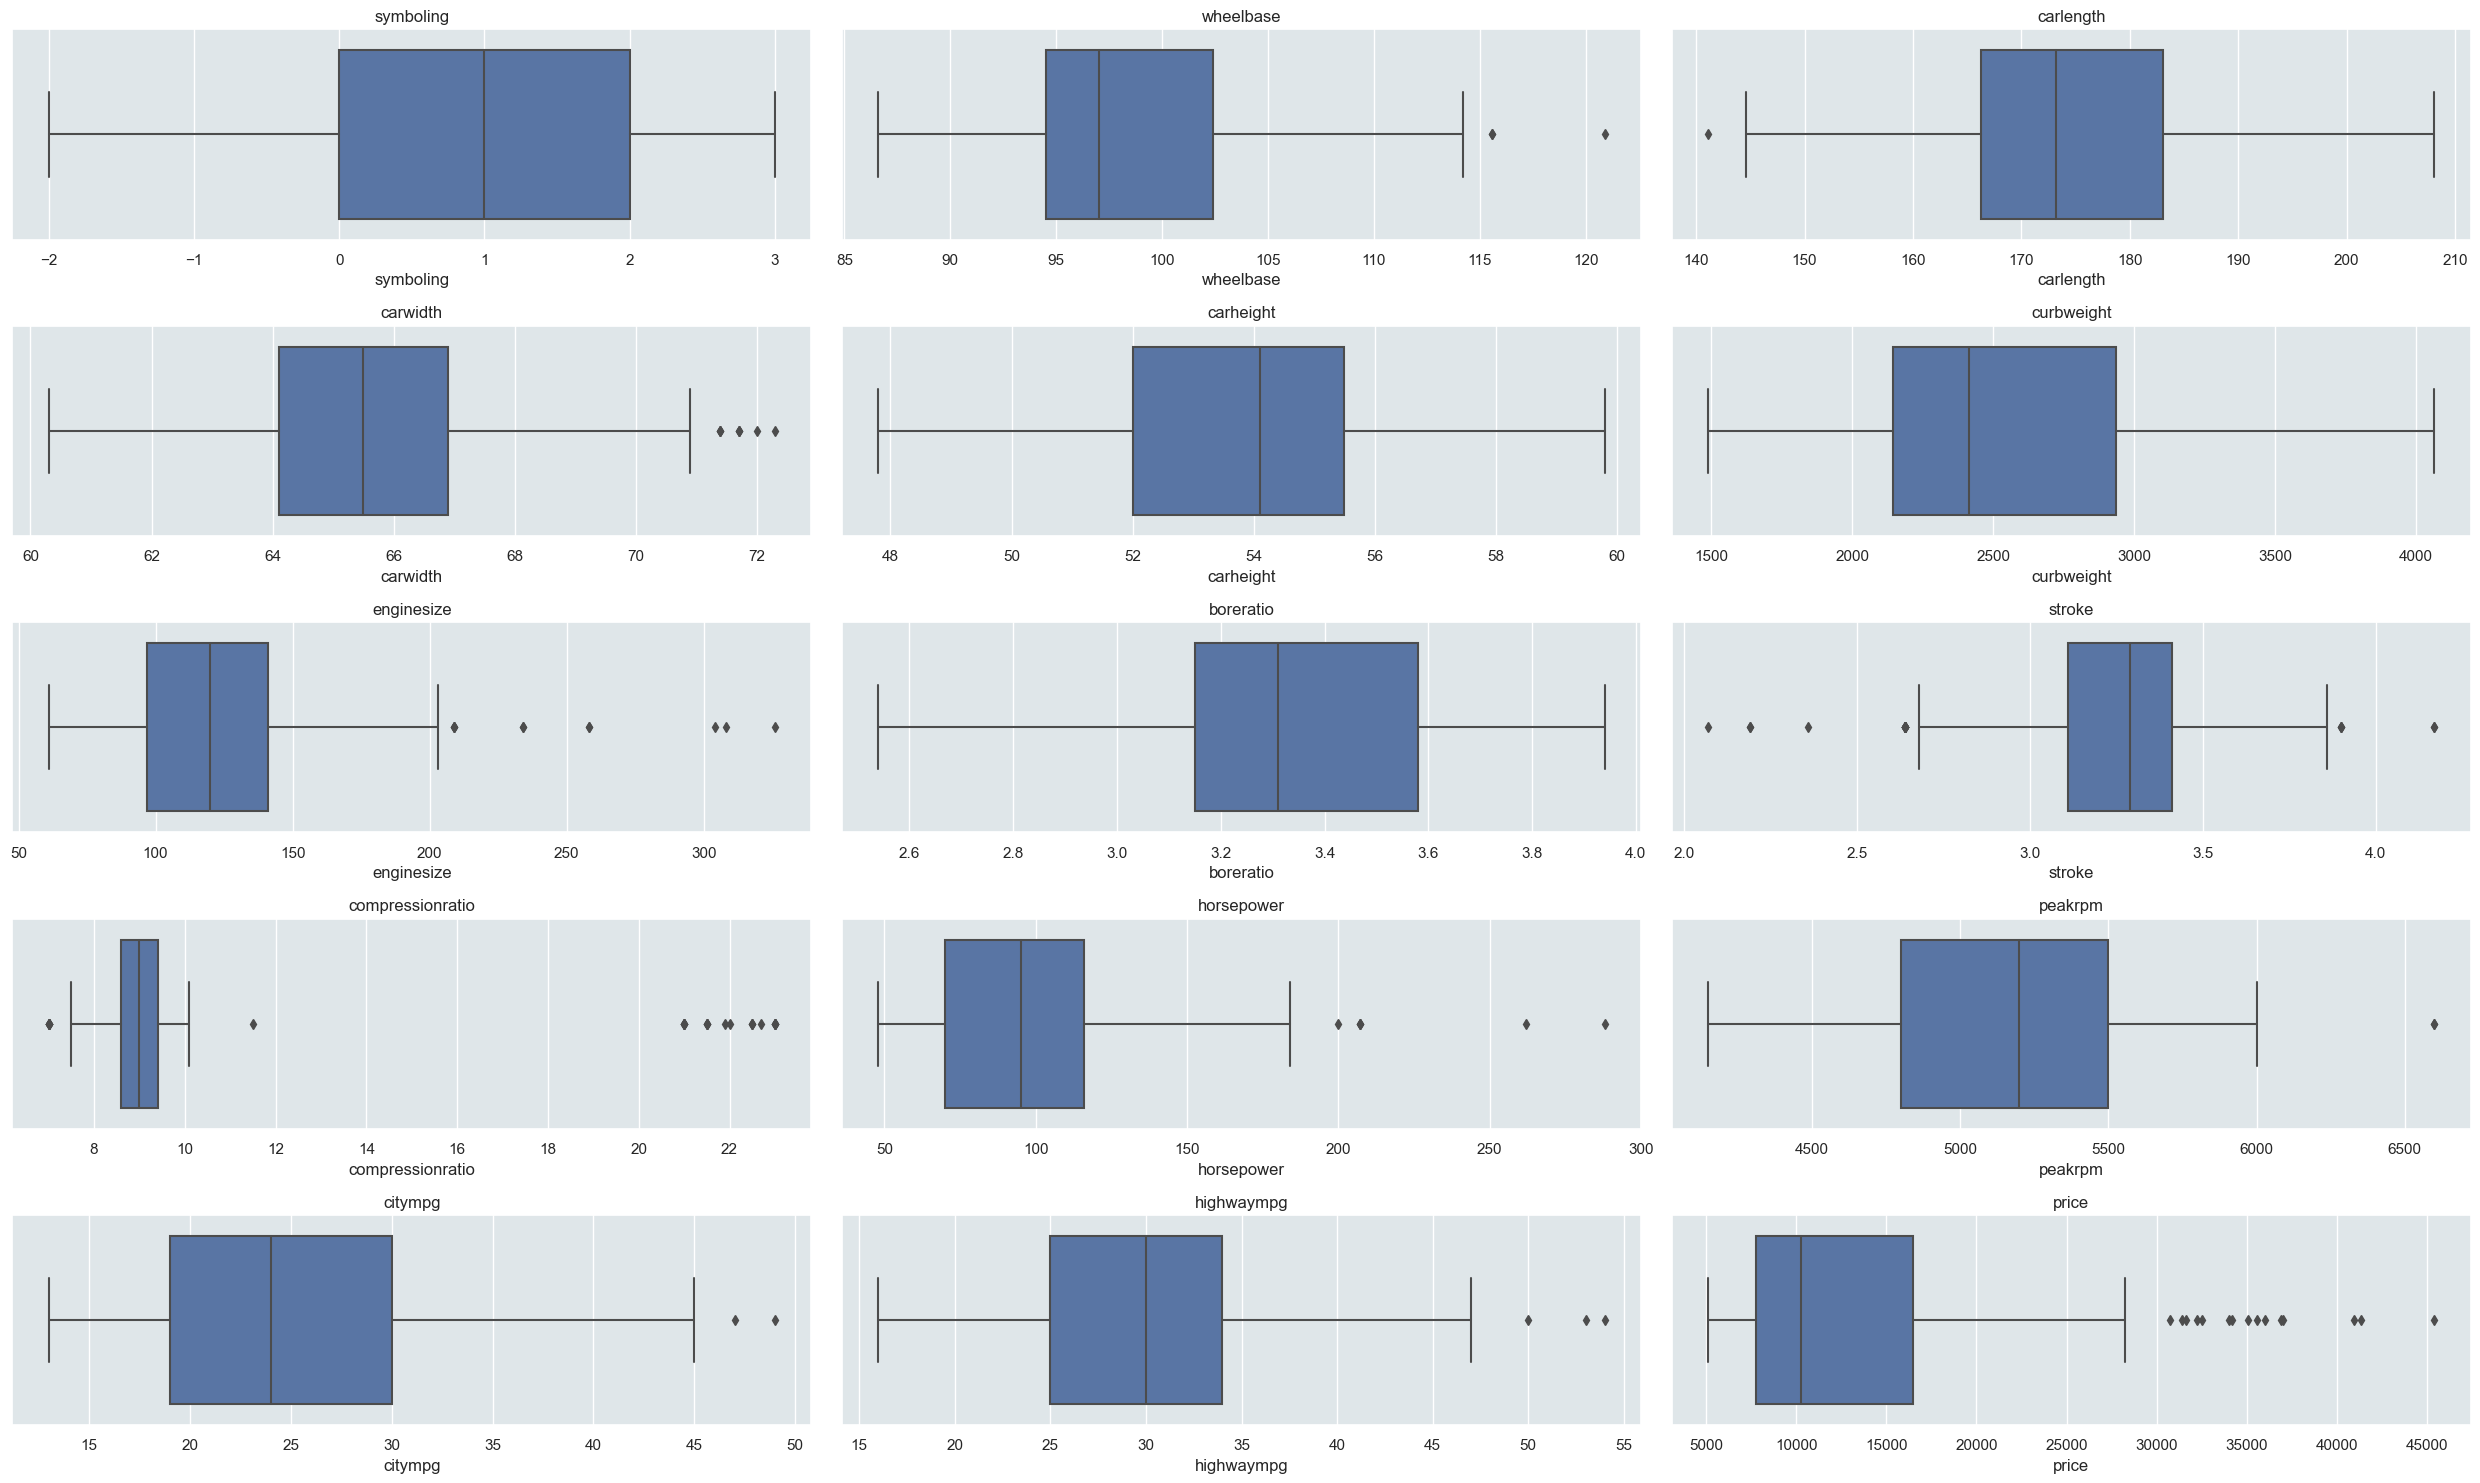

In [74]:
seaborn.set(rc={'axes.facecolor':'#dfe6e9', 'figure.facecolor':'#fff'})

fig, axes = plt.subplots(5, 3, figsize=(25, 15))

for ax, col in zip(axes.flat, data_boxplot.columns):
   seaborn.boxplot(data_boxplot[col], ax=ax)
   ax.set_title(col)

plt.tight_layout()
plt.show()

Ta sẽ tiến hành xử lý, loại bỏ outliers

**Định nghĩa hàm tìm outliers dùng interquartile range (IQR)**

In [78]:
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

**Tìm outliers trên các giá trị thuộc biến độc lập**

In [79]:
symboling_outliers = find_outliers_IQR(df['symboling'])
symboling_outliers

Series([], Name: symboling, dtype: int64)

In [80]:
wheelbase_outliers = find_outliers_IQR(df['wheelbase'])
wheelbase_outliers

70    115.6
71    115.6
73    120.9
Name: wheelbase, dtype: float64

In [83]:
carlength_outliers = find_outliers_IQR(df['carlength'])
carlength_outliers

18    141.1
Name: carlength, dtype: float64

In [85]:
carwidth_outliers = find_outliers_IQR(df['carwidth'])
carwidth_outliers


6      71.4
7      71.4
8      71.4
70     71.7
71     71.7
73     71.7
74     72.0
129    72.3
Name: carwidth, dtype: float64

In [81]:
carheight_outliers = find_outliers_IQR(df['carheight'])
carheight_outliers

Series([], Name: carheight, dtype: float64)

In [82]:
curbweight_outliers = find_outliers_IQR(df['curbweight'])
curbweight_outliers

Series([], Name: curbweight, dtype: int64)

In [84]:
enginesize_outliers = find_outliers_IQR(df['enginesize'])
enginesize_outliers

15    209
16    209
17    209
47    258
48    258
49    326
71    234
72    234
73    308
74    304
Name: enginesize, dtype: int64

In [93]:
boreratio_outliers = find_outliers_IQR(df['boreratio'])
boreratio_outliers


Series([], Name: boreratio, dtype: float64)

In [86]:
stroke_outliers = find_outliers_IQR(df['stroke'])
stroke_outliers

29     3.90
47     4.17
48     4.17
111    2.19
113    2.19
130    3.90
131    3.90
134    2.07
138    2.36
139    2.64
140    2.64
141    2.64
142    2.64
143    2.64
144    2.64
145    2.64
146    2.64
147    2.64
148    2.64
149    2.64
Name: stroke, dtype: float64

In [87]:
compressionratio_outliers = find_outliers_IQR(df['compressionratio'])
compressionratio_outliers

9       7.0
29      7.0
49     11.5
63     22.7
66     22.0
67     21.5
68     21.5
69     21.5
70     21.5
82      7.0
83      7.0
84      7.0
90     21.9
108    21.0
110    21.0
112    21.0
114    21.0
116    21.0
117     7.0
124     7.0
158    22.5
159    22.5
174    22.5
182    23.0
184    23.0
187    23.0
192    23.0
203    23.0
Name: compressionratio, dtype: float64

In [88]:
horsepower_outliers = find_outliers_IQR(df['horsepower'])
horsepower_outliers

49     262
105    200
126    207
127    207
128    207
129    288
Name: horsepower, dtype: int64

In [89]:
peakrpm_outliers = find_outliers_IQR(df['peakrpm'])
peakrpm_outliers

165    6600
166    6600
Name: peakrpm, dtype: int64

In [90]:
citympg_outliers = find_outliers_IQR(df['citympg'])
citympg_outliers

18    47
30    49
Name: citympg, dtype: int64

In [91]:
highwaympg_outliers = find_outliers_IQR(df['highwaympg'])
highwaympg_outliers

18    53
30    54
90    50
Name: highwaympg, dtype: int64

In [92]:
price_outliers = find_outliers_IQR(df['price'])
price_outliers

15     30760.0
16     41315.0
17     36880.0
47     32250.0
48     35550.0
49     36000.0
70     31600.0
71     34184.0
72     35056.0
73     40960.0
74     45400.0
126    32528.0
127    34028.0
128    37028.0
129    31400.5
Name: price, dtype: float64

**Loại bỏ các giá trị outliers**

**Outerliers** ảnh hưởng rất nhiều về tính đúng đắn của mô hình khi xây dựng. Ta cần xử lý outliers bằng cách

* Tìm các vị trí chứa giá trị outliers
* Kiểm tra chỉnh sửa, hoặc loại bỏ nếu cần thiết

Có thể thấy, vị trí tại index = [142,143,144] chứa giá trị ngoại lai, ta tiến hành loại bỏ những hàng (records) này

In [99]:
indices_to_drop = [6, 7, 8, 9, 15, 16, 17, 18, 29, 30, 47, 48, 49, 63, 66, 67, 68, 69, 70, 71, 72, 73, 74, 82, 83, 84, 90, 105, 108, 110, 111, 112, 113, 114, 116, 117, 124, 126, 127, 128, 129, 130, 131, 134, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 158, 159, 165, 166, 174, 182, 184, 187, 192, 203]
data1 = df.drop(indices_to_drop)

In [100]:
data1.describe().round(2)

,ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,139.00,139.00,139.00,139.00,139.00,139.00,139.00,139.00,139.00,139.00,139.00,139.00,139.00,139.00,139.00,139.00
mean,102.09,0.85,97.65,171.49,65.29,53.58,2408.76,115.68,3.27,3.27,8.97,96.95,5220.50,25.73,31.57,10922.51
std,62.31,1.23,4.53,10.70,1.51,2.43,403.64,26.22,0.25,0.19,0.53,29.36,409.17,5.53,5.61,4500.01
min,1.00,-2.00,86.60,144.60,61.80,48.80,1819.00,70.00,2.68,2.68,7.50,60.00,4200.00,16.00,22.00,5195.00
25%,45.50,0.00,94.50,165.30,63.90,51.80,2026.00,92.00,3.05,3.15,8.70,70.00,5000.00,21.00,28.00,7372.00
50%,97.00,1.00,96.30,171.70,65.20,53.90,2370.00,110.00,3.19,3.27,9.00,90.00,5200.00,25.00,32.00,9258.00
75%,162.50,2.00,100.10,177.55,66.50,55.10,2712.00,130.00,3.43,3.40,9.40,114.00,5500.00,31.00,37.00,13572.00
max,205.00,3.00,114.20,198.90,68.90,59.80,3296.00,181.00,3.94,3.58,10.10,175.00,6000.00,38.00,47.00,24565.00


**Sau khi đã loại bỏ outliers, ta tiến hành kiểm tra lại dữ liệu bằng biểu đồ boxplot**

In [102]:
data_draw_boxplot = data1.copy()
columns_drop = ['ID','name', 'fueltypes', 'aspiration', 'doornumbers', 'carbody', 'drivewheels', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
data_draw_boxplot.drop(columns=columns_drop, axis=1, inplace=True)
data_draw_boxplot

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,104.3,188.8,67.2,57.5,3157,130,3.62,3.15,7.5,162,5100,17,22,18950.0
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0


C:\Users\Thuong\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Thuong\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Thuong\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Thuong\anaconda3\li

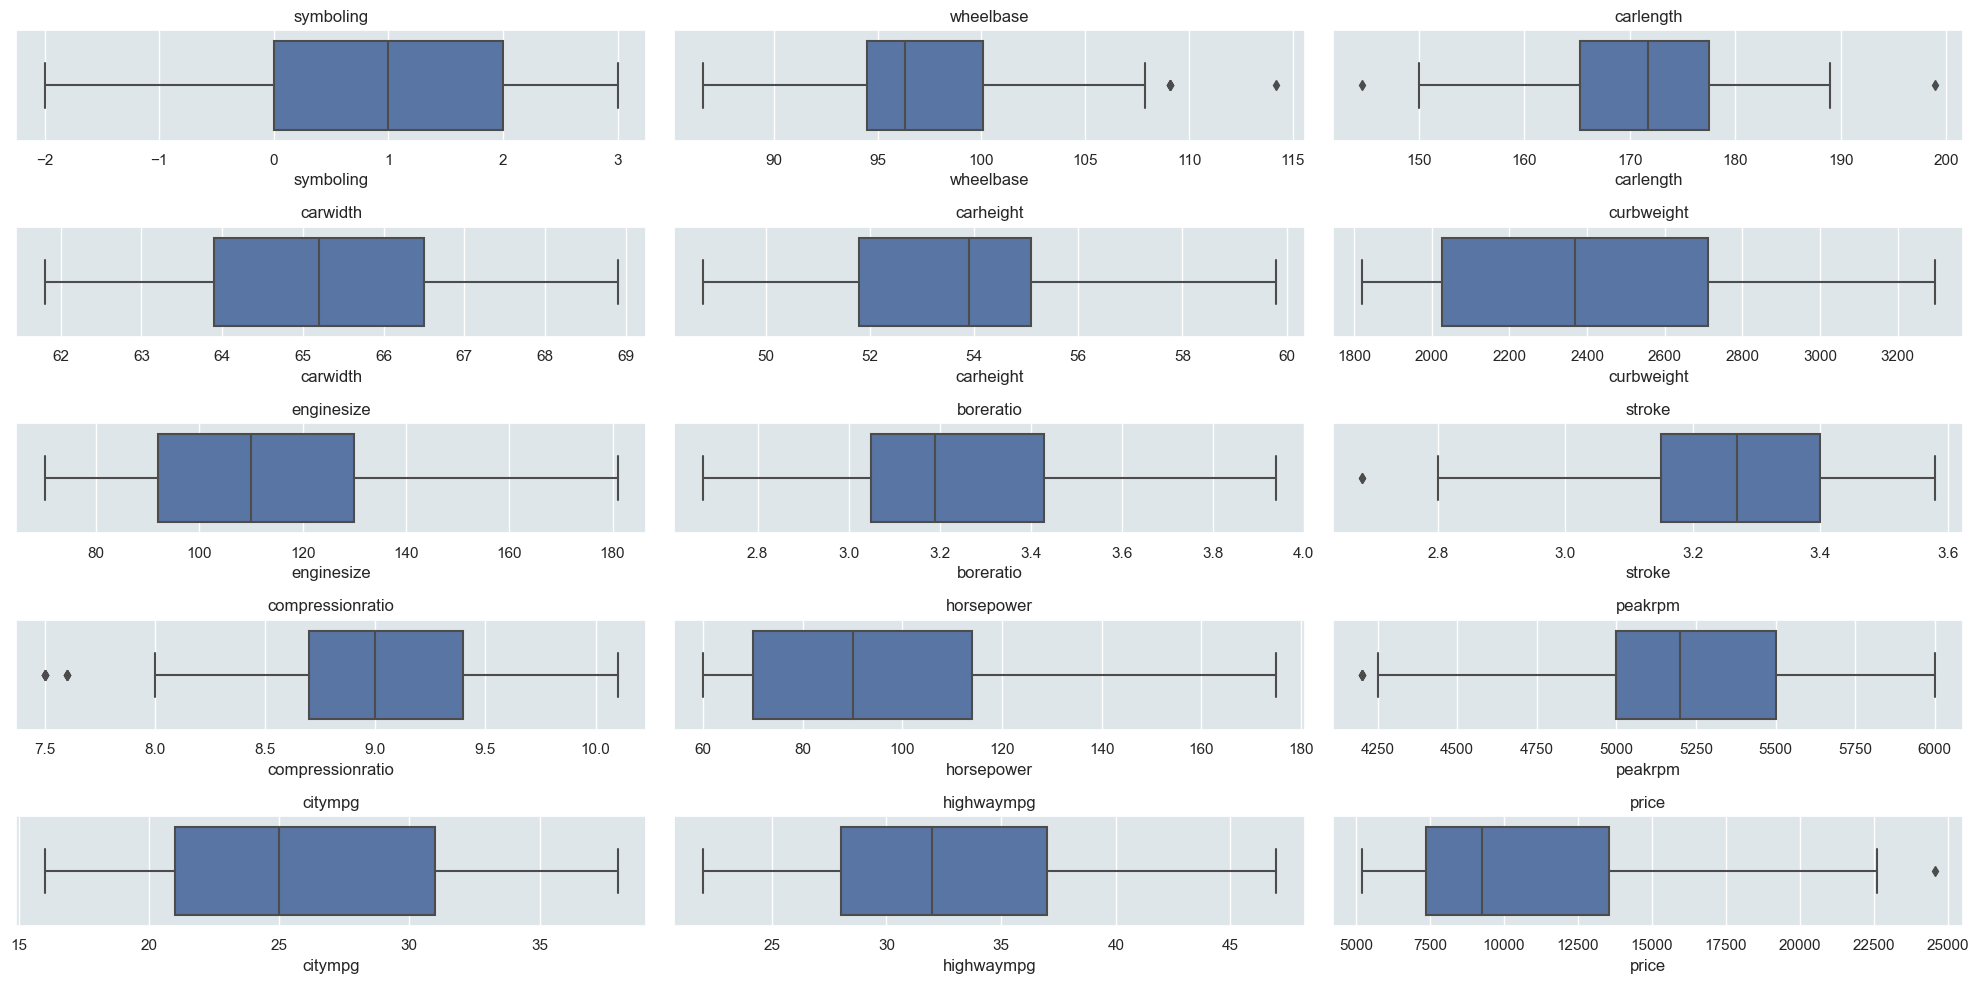

In [103]:
fig, axes = plt.subplots(5, 3, figsize=(20, 10))

for ax, col in zip(axes.flat, data_draw_boxplot.columns):
   seaborn.boxplot(data_draw_boxplot[col], ax=ax)
   ax.set_title(col)
plt.tight_layout()
plt.show()

**Một số bđ trực quan**

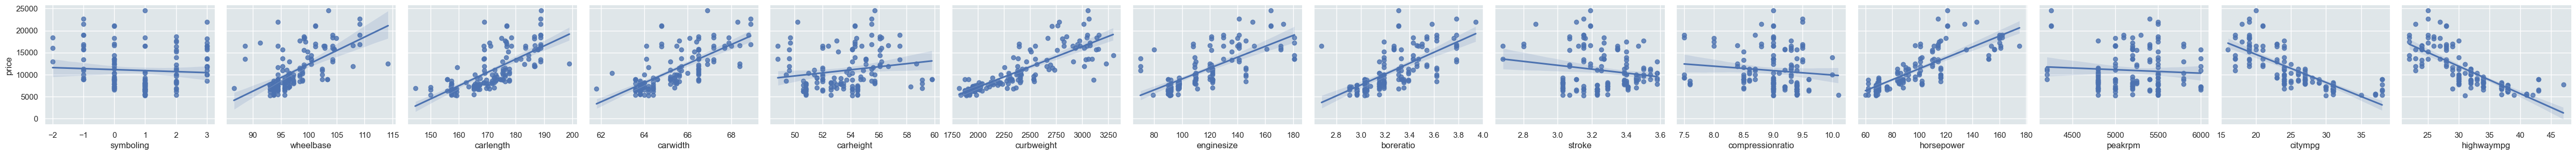

In [108]:
plt.figsize=(30, 15)
seaborn.pairplot(data1, x_vars=['symboling', 'wheelbase', 'carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg'], y_vars=['price'], kind='reg',height=3, aspect=1.2)

In [111]:
sp = data1[['symboling', 'wheelbase', 'carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']].value_counts()
sp = pd.DataFrame(sp)
sp.T

symboling            1           3     1     0     3     1                    \
wheelbase        93.7  94.5  88.6  98.8  98.8  95.3  93.7        102.7 95.7    
carlength        157.3 155.9 168.8 177.8 177.8 169.0 157.3       178.4 158.7   
carwidth          63.8  63.6  64.1  66.5  66.5  65.7  63.8        68.0  63.6   
carheight         50.8  52.0  48.8  53.7  55.5  49.6  50.6        54.8  54.5   
curbweight        2128  1874  2548  2385  2410  2380  1967  1989  2910  1985   
enginesize         98    90    130   122   122   70    90    90    140   92    
boreratio         3.03  3.03  3.47  3.39  3.39  3.33  2.97  2.97  3.78  3.05   
stroke           3.390 3.110 2.680 3.390 3.390 3.255 3.230 3.230 3.120 3.030   
compressionratio   7.6   9.6   9.0   8.6   8.6   9.4   9.4   9.4   8.0   9.0   
horsepower         102   70    111   84    84    101   68    68    175   62    
peakrpm           5500  5400  5000  4800  4800  6000  5500  5500  5000  4800   
citympg             24    38    21    26    26    17    31    31    19    35   
highwaympg          30    43    27    32    32    23    38    38    24    39   
0                    2     2     2     2     2     2     2     2     1     1   

symboling         ...     0                                                  \
wheelbase         ... 100.4             98.8  97.2        96.5                
carlength         ... 183.1 181.7 180.2 177.8 173.4       175.4               
carwidth          ...  66.9  66.5  66.9  66.5  65.2        65.2        62.5   
carheight         ...  55.1  55.1  55.1  55.5  54.7        54.1        54.1   
curbweight        ...  2563  3095  2661  2425  2324  2302  2465  2304  2372   
enginesize        ...   109   181   136   122   120   120   110   110   110   
boreratio         ...  3.19  3.43  3.19  3.39  3.33  3.33  3.15  3.15  3.15   
stroke            ... 3.400 3.270 3.400 3.390 3.470 3.470 3.580 3.580 3.580   
compressionratio  ...   9.0   9.0   8.5   8.6   8.5   8.5   9.0   9.0   9.0   
horsepower        ...   88    152   110   84    97    97    101   86    86    
peakrpm           ...  5500  5200  5500  4800  5200  5200  5800  5800  5800   
citympg           ...    25    17    19    26    27    27    24    27    27   
highwaympg        ...    31    22    24    32    34    34    28    33    33   
0                 ...     1     1     1     1     1     1     1     1     1   

symboling            3  
wheelbase        102.9  
carlength        183.5  
carwidth          67.7  
carheight         52.0  
curbweight        3016  
enginesize         171  
boreratio         3.27  
stroke           3.350  
compressionratio   9.3  
horsepower         161  
peakrpm           5200  
citympg             19  
highwaympg          24  
0                    1  

[1 rows x 131 columns]

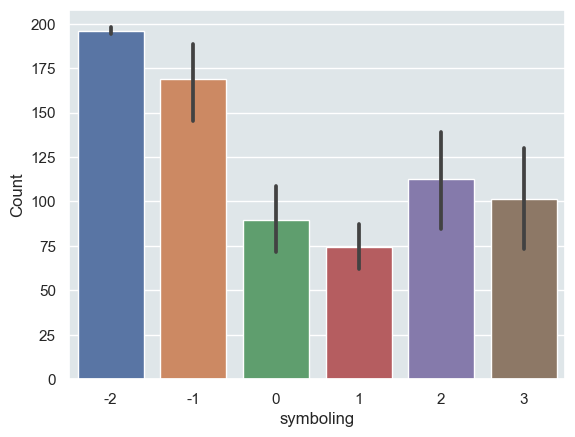

In [113]:
seaborn.barplot(x=data1['symboling'], y=data1.index)
plt.xlabel('symboling')
plt.ylabel('Count')
plt.show()

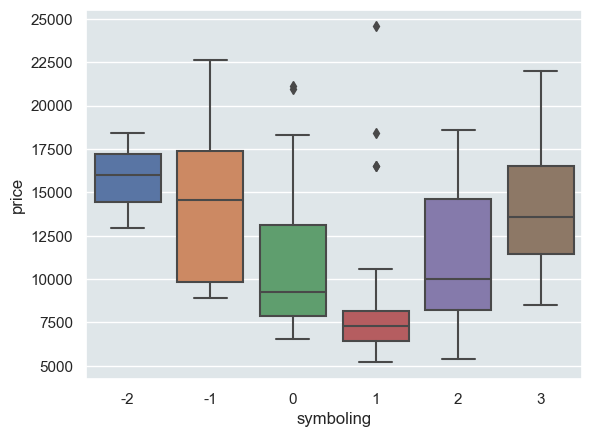

In [115]:
seaborn.boxplot(x='symboling', y='price', data=data1)
plt.show()

**Xây dựng mô hình**

In [117]:
features = ['symboling', 'wheelbase', 'carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']

In [118]:
X = data1[features]
y = data1['price']

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [122]:
print('Số giá trị trong từng bộ dữ liệu')
print('X_train: ', np.shape(X_train))
print('y_train: ', np.shape(y_train))
print('X_test: ', np.shape(X_test))
print('y_test: ', np.shape(y_test))

Số giá trị trong từng bộ dữ liệu
X_train:  (111, 14)
y_train:  (111,)
X_test:  (28, 14)
y_test:  (28,)


In [123]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Đánh giá mức độ phụ thuộc của biến phụ với biến độc lập**

In [124]:
model.score(X_test, y_test)

0.8002078996208108

--> kết quả là 0.8 tương đương với 80% giá trị của biến phụ thuộc phụ thuộc vào các giá trị của biến độc lập


**Vì đây là mô hình hồi quy đa tuyến tính Multiple Linear Regression , hàm số giả thuyết có dạng** 


y = α1X1 + α2X2 + α3X3 + ... + αnXn + β

* X1 - Xn: các biến độc lập
* y: biến phụ thuộc
* α và β: các tham số không thay đổi của hàm
* n: số lượng biến độc lập

In [126]:
print('Model intercept: ', model.intercept_)
print('Model coefficients: ', model.coef_)

Model intercept:  5113.322165938766
Model coefficients:  [-4.08068911e+01  2.67170733e+02 -7.41708893e+01  7.48799188e+01
 -1.57267936e+02  1.27883310e+00  3.17327029e+01  7.82734572e+02
 -5.27571294e+03  9.94886331e+02  2.85019739e+01 -6.42062398e-02
 -5.81786622e+02  2.41528207e+02]


In [127]:
print('y = ' + str('%.2f' % model.intercept_) + ' + ' + str('%.2f' % model.coef_[0]) + '*X1 ' + str('%.2f' % model.coef_[1]) + '*X2 ' +
      str('%.2f' % model.coef_[2]) + '*X3 + ' + str('%.2f' % model.coef_[3]) + '*X4 + ' + str('%.2f' % model.coef_[4]) + '*X5')

y = 5113.32 + -40.81*X1 267.17*X2 -74.17*X3 + 74.88*X4 + -157.27*X5


**Dùng mô hình dự đoán tập X_test**

In [129]:
predicts = model.predict(X_test)

**Đánh giá mức độ phụ thuộc giữa predicts và y_test, ở đây là mức độ các giá trị giống như giữa 1 tập**

In [130]:
r2_score(y_test, predicts)

0.8002078996208108

**Tạo 1 dataframe gồm 2 cột là price thực tế và price dự đoán**

In [132]:
price_test = pd.DataFrame(y_test)
price_test.reset_index(drop=True, inplace=True)
price_test.head()

,price
0,6849.0
1,8499.0
2,10945.0
3,8238.0
4,15250.0


In [133]:
price_predicted = pd.DataFrame(predicts.round(2), columns=['Predicted price'])
price_predicted.head()

,Predicted price
0,6816.76
1,10060.61
2,13245.66
3,8748.48
4,13462.52


In [134]:
# giá so sánh
price_comparing = pd.concat([price_test, price_predicted], axis=1)
price_comparing

,price,Predicted price
0,6849.0,6816.76
1,8499.0,10060.61
2,10945.0,13245.66
3,8238.0,8748.48
4,15250.0,13462.52
5,7957.0,8943.81
6,8845.0,7570.23
7,8558.0,9055.83
8,6989.0,9888.05
9,9549.0,8943.35


--> Từ sự so sánh trên, ta có thể thấy các giá trị dự đoán có xu hướng sai khi price nhỏ

Ta sẽ dùng biểu đồ scatter để xem xét giá trị dự đoán và giá trị thực tế trên từng biến độc lập

Text(0.5, 0.98, 'So sánh giá price (Thực tế) - Màu xanh và Predicted price (Dự đoán) - Màu đỏ')

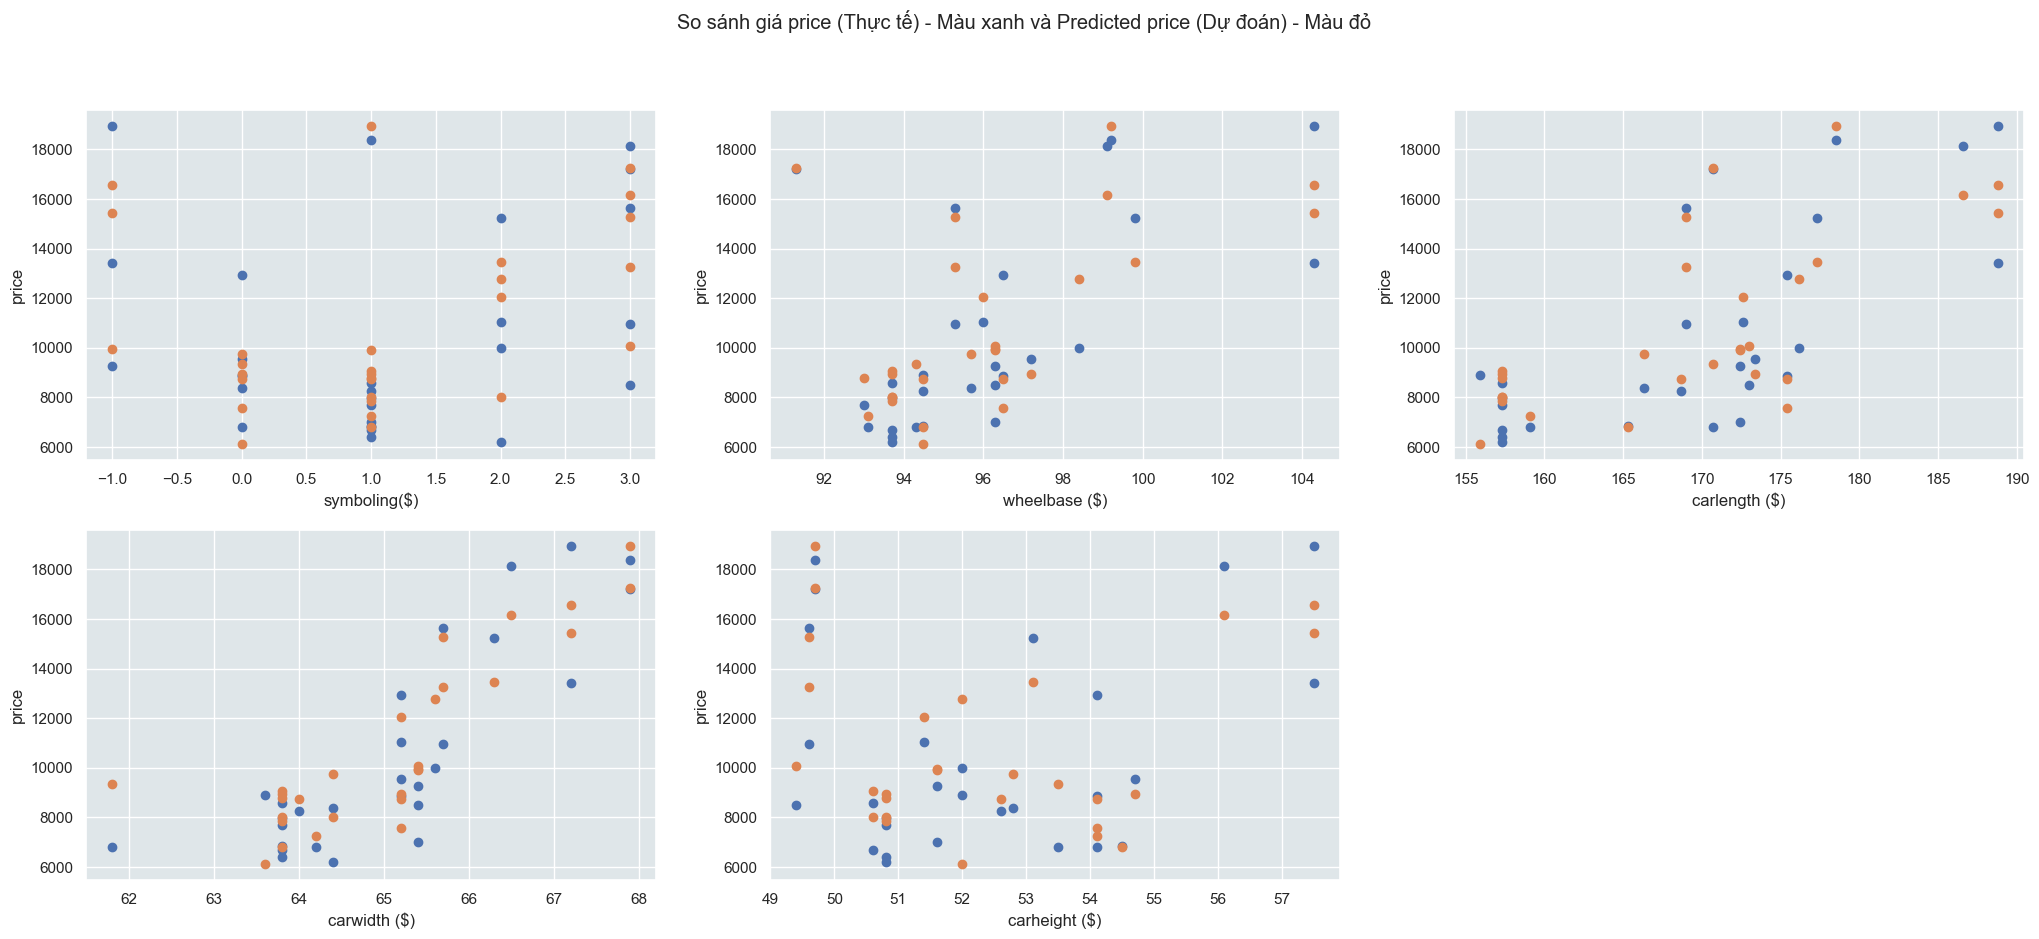

In [136]:
seaborn.set(rc={'axes.facecolor':'#dfe6e9', 'figure.facecolor':'#fff'})

fig, ax = plt.subplots(2, 3, figsize=(25, 10))
ax[0, 0].scatter(X_test['symboling'], y_test)
ax[0, 0].scatter(X_test['symboling'], predicts)

ax[0, 0].set_xlabel('symboling($)')
ax[0, 0].set_ylabel('price')

# new item
ax[0, 1].scatter(X_test['wheelbase'], y_test)
ax[0, 1].scatter(X_test['wheelbase'], predicts)

ax[0, 1].set_xlabel('wheelbase ($)')
ax[0, 1].set_ylabel('price')

# new item
ax[0, 2].scatter(X_test['carlength'], y_test)
ax[0, 2].scatter(X_test['carlength'], predicts)

ax[0, 2].set_xlabel('carlength ($)')
ax[0, 2].set_ylabel('price')

# new item
ax[1, 0].scatter(X_test['carwidth'], y_test)
ax[1, 0].scatter(X_test['carwidth'], predicts)

ax[1, 0].set_xlabel('carwidth ($)')
ax[1, 0].set_ylabel('price')

# new item
ax[1, 1].scatter(X_test['carheight'], y_test)
ax[1, 1].scatter(X_test['carheight'], predicts)

ax[1, 1].set_xlabel('carheight ($)')
ax[1, 1].set_ylabel('price')

ax[1,2].axis('off')

fig.suptitle('So sánh giá price (Thực tế) - Màu xanh và Predicted price (Dự đoán) - Màu đỏ')

 